In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd

from skimage.filters import threshold_local
from PIL import Image

import warnings
warnings.filterwarnings('ignore')

In [5]:
directory = '/kaggle/input/gagarin-hack-preparation/photo/images/rus_internalpassport'

In [6]:
file_name = directory + '/07.jpg'

In [5]:
! pip install super-image

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.0/91.0 kB 3.2 MB/s eta 0:00:00


In [6]:
from super_image import EdsrModel, ImageLoader

image = Image.open(file_name)

model = EdsrModel.from_pretrained('eugenesiow/edsr-base', scale=3).to('cuda')
inputs = ImageLoader.load_image(image)
preds = model(inputs)

ImageLoader.save_image(preds, './scaled_2x.png')

config.json:   0%|          | 0.00/188 [00:00<?, ?B/s]

pytorch_model_3x.pt:   0%|          | 0.00/6.25M [00:00<?, ?B/s]

https://huggingface.co/eugenesiow/edsr-base/resolve/main/pytorch_model_3x.pt


In [8]:
import easyocr

reader = easyocr.Reader(['ru'], gpu=True)

img = cv2.imread(file_name)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

results = reader.readtext(img)
df = pd.DataFrame(results, columns=['bbox', 'text', 'conf'])

Progress: |██████████████████████████████████████████████████| 100.1% Complete

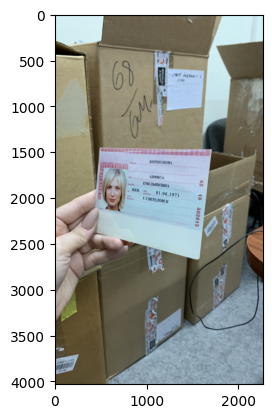

In [9]:
plt.imshow(img)

In [10]:
df

,bbox,text,conf
0,"[[590, 501], [897, 501], [897, 839], [590, 839]]",0',0.417035
1,"[[1295, 640], [1611, 640], [1611, 705], [1295,...","7"" #мчиа ,",0.024477
2,"[[854, 876], [1079, 876], [1079, 1142], [854, ...",М,0.979107
3,"[[1023, 1583], [1285, 1583], [1285, 1650], [10...",КОРШУНОВА,0.999703
4,"[[1020, 1747], [1197, 1747], [1197, 1812], [10...",АНФИСА,0.999996
5,"[[951, 1818], [1257, 1818], [1257, 1902], [951...",ЕМЕЛЬЯНОВНА,0.999550
6,"[[951, 1987], [988, 1987], [988, 2028], [951, ...",Г,0.540531
7,"[[1555, 1955], [1607, 1955], [1607, 2035], [15...",6,0.991937
8,"[[833.9074644389061, 1886.1003079700931], [932...",ЖЕН:,0.918507
9,"[[1099.1423139959816, 1915.05274336745], [1368...",01.06.1971,0.694804


In [11]:
df_conf = df.loc[df['conf'] > 0.3]
df_conf

,bbox,text,conf
0,"[[590, 501], [897, 501], [897, 839], [590, 839]]",0',0.417035
2,"[[854, 876], [1079, 876], [1079, 1142], [854, ...",М,0.979107
3,"[[1023, 1583], [1285, 1583], [1285, 1650], [10...",КОРШУНОВА,0.999703
4,"[[1020, 1747], [1197, 1747], [1197, 1812], [10...",АНФИСА,0.999996
5,"[[951, 1818], [1257, 1818], [1257, 1902], [951...",ЕМЕЛЬЯНОВНА,0.999550
6,"[[951, 1987], [988, 1987], [988, 2028], [951, ...",Г,0.540531
7,"[[1555, 1955], [1607, 1955], [1607, 2035], [15...",6,0.991937
8,"[[833.9074644389061, 1886.1003079700931], [932...",ЖЕН:,0.918507
9,"[[1099.1423139959816, 1915.05274336745], [1368...",01.06.1971,0.694804
10,"[[992.2736737481338, 1982.0441247346969], [125...",СВЕРДЛОВСК,0.999967


In [12]:
import re

def has_no_special_chars(s):
    return re.match(r'^[.,\-\w\s:;]+$', s) is not None

In [13]:
df_res = df_conf[df_conf['text'].apply(lambda x: len(x) > 1 and has_no_special_chars(x))]
df_res

,bbox,text,conf
3,"[[1023, 1583], [1285, 1583], [1285, 1650], [10...",КОРШУНОВА,0.999703
4,"[[1020, 1747], [1197, 1747], [1197, 1812], [10...",АНФИСА,0.999996
5,"[[951, 1818], [1257, 1818], [1257, 1902], [951...",ЕМЕЛЬЯНОВНА,0.999550
8,"[[833.9074644389061, 1886.1003079700931], [932...",ЖЕН:,0.918507
9,"[[1099.1423139959816, 1915.05274336745], [1368...",01.06.1971,0.694804
10,"[[992.2736737481338, 1982.0441247346969], [125...",СВЕРДЛОВСК,0.999967


In [14]:
reader = easyocr.Reader(['ru'], gpu=True)

rotated_image = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)

results = reader.readtext(rotated_image)
df_rotated = pd.DataFrame(results, columns=['bbox', 'text', 'conf'])

In [15]:
df_rotated

,bbox,text,conf
0,"[[1806, 640], [1885, 640], [1885, 701], [1806,...",42,1.000000
1,"[[1958, 660], [2035, 660], [2035, 715], [1958,...",16,0.996221
2,"[[2093, 663], [2332, 663], [2332, 753], [2093,...",302815,0.999733
3,"[[644, 698], [700, 698], [700, 876], [644, 876]]",;,0.986724
4,"[[1583, 982], [1648, 982], [1648, 1247], [1583...",[,0.647693
5,"[[1748, 1070], [1812, 1070], [1812, 1250], [17...",5,0.884456
6,"[[1923, 1104], [1979, 1104], [1979, 1175], [19...",5,0.970063
7,"[[1987, 1275], [2028, 1275], [2028, 1313], [19...",[,0.264748
8,"[[525, 1388], [848, 1388], [848, 1667], [525, ...",3,0.796803
9,"[[1953.6486844953406, 898.0088214572802], [200...",5,0.168869


In [16]:
df_rotated_conf = df_rotated.loc[df_rotated['conf'] > 0.5]
df_rotated_conf

,bbox,text,conf
0,"[[1806, 640], [1885, 640], [1885, 701], [1806,...",42,1.000000
1,"[[1958, 660], [2035, 660], [2035, 715], [1958,...",16,0.996221
2,"[[2093, 663], [2332, 663], [2332, 753], [2093,...",302815,0.999733
3,"[[644, 698], [700, 698], [700, 876], [644, 876]]",;,0.986724
4,"[[1583, 982], [1648, 982], [1648, 1247], [1583...",[,0.647693
5,"[[1748, 1070], [1812, 1070], [1812, 1250], [17...",5,0.884456
6,"[[1923, 1104], [1979, 1104], [1979, 1175], [19...",5,0.970063
8,"[[525, 1388], [848, 1388], [848, 1667], [525, ...",3,0.796803
10,"[[1852.7987709857643, 1010.0033753757776], [19...",1,0.532027


In [17]:
def is_numeric_and_length_gt_1(s):
    return s.isdigit() and len(s) > 1 and has_no_special_chars(s)

In [18]:
df_rotated_res = df_rotated_conf[df_rotated_conf['text'].apply(is_numeric_and_length_gt_1)]
df_rotated_res

,bbox,text,conf
0,"[[1806, 640], [1885, 640], [1885, 701], [1806,...",42,1.000000
1,"[[1958, 660], [2035, 660], [2035, 715], [1958,...",16,0.996221
2,"[[2093, 663], [2332, 663], [2332, 753], [2093,...",302815,0.999733


In [19]:
ocr_res = pd.concat([df_res, df_rotated_res])
ocr_res

,bbox,text,conf
3,"[[1023, 1583], [1285, 1583], [1285, 1650], [10...",КОРШУНОВА,0.999703
4,"[[1020, 1747], [1197, 1747], [1197, 1812], [10...",АНФИСА,0.999996
5,"[[951, 1818], [1257, 1818], [1257, 1902], [951...",ЕМЕЛЬЯНОВНА,0.999550
8,"[[833.9074644389061, 1886.1003079700931], [932...",ЖЕН:,0.918507
9,"[[1099.1423139959816, 1915.05274336745], [1368...",01.06.1971,0.694804
10,"[[992.2736737481338, 1982.0441247346969], [125...",СВЕРДЛОВСК,0.999967
0,"[[1806, 640], [1885, 640], [1885, 701], [1806,...",42,1.000000
1,"[[1958, 660], [2035, 660], [2035, 715], [1958,...",16,0.996221
2,"[[2093, 663], [2332, 663], [2332, 753], [2093,...",302815,0.999733
